In [1]:
import os
current_dir = os.getcwd()
current_dir

'/home/abdulah/Code_codes/customer_personality_analysis/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/home/abdulah/Code_codes/customer_personality_analysis'

In [4]:
import pandas as pd

# Load the dataset
file_path = "cleaned_marketing_campaign.csv"
df = pd.read_csv(file_path)

# Check basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2240 non-null   int64  
 1   Birth Year                  2240 non-null   int64  
 2   Education Level             2240 non-null   object 
 3   Marital Status              2240 non-null   object 
 4   Annual Income               2240 non-null   float64
 5   Kids In Household           2240 non-null   int64  
 6   Teens In Household          2240 non-null   int64  
 7   Date Of Enrollment          2240 non-null   object 
 8   Last Purchase days          2240 non-null   int64  
 9   Wines Expenditure           2240 non-null   float64
 10  Fruits Expenditure          2240 non-null   float64
 11  Meat Products Expenditure   2240 non-null   float64
 12  Fish Products Expenditure   2240 non-null   float64
 13  Sweet Products Expenditure  2240 

In [5]:
# Drop unnecessary columns  
df.drop(columns=['ID', 'Birth Year', 'Kids In Household', 'Teens In Household', 'Date Of Enrollment'], inplace=True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Education Level             2240 non-null   object 
 1   Marital Status              2240 non-null   object 
 2   Annual Income               2240 non-null   float64
 3   Last Purchase days          2240 non-null   int64  
 4   Wines Expenditure           2240 non-null   float64
 5   Fruits Expenditure          2240 non-null   float64
 6   Meat Products Expenditure   2240 non-null   float64
 7   Fish Products Expenditure   2240 non-null   float64
 8   Sweet Products Expenditure  2240 non-null   float64
 9   Gold Products Expendture    2240 non-null   float64
 10  Deals Purchases Count       2240 non-null   int64  
 11  Web Purchases Count         2240 non-null   int64  
 12  Catalog Purchases Count     2240 non-null   int64  
 13  Store Purchases Count       2240 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Encoding categorical features
df_encoded = pd.get_dummies(df, columns=['Education Level', 'Marital Status'], drop_first=True)

# Define target variable
df_encoded['Accepted Campaign 1'] = df_encoded['Accepted Campaign 1'].astype(int)  # Convert to integer (0 or 1)

# Define features and target variable
X = df_encoded.drop(columns=['Accepted Campaign 1'])  # Features
y = df_encoded['Accepted Campaign 1']  # Target variable

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Set the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples at a leaf node
    'class_weight': ['balanced', None]  # Handle class imbalance
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Hyperparameters: ", grid_search.best_params_)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END class_weight=balanced, max_depth=None, min_samples_

In [11]:
# Use the best model to make predictions
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_rf_model.predict(X_test)

In [13]:
# Evaluate the tuned model
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report for Tuned Model:\n", classification_report(y_test, y_pred_best))

Tuned Model Accuracy: 0.9620535714285714
Classification Report for Tuned Model:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       419
           1       0.83      0.52      0.64        29

    accuracy                           0.96       448
   macro avg       0.90      0.76      0.81       448
weighted avg       0.96      0.96      0.96       448



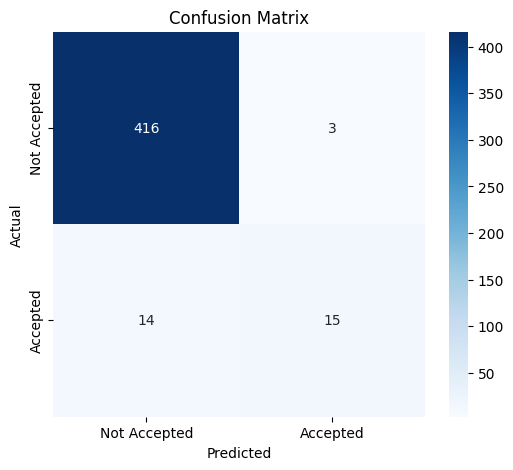

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Accepted', 'Accepted'], yticklabels=['Not Accepted', 'Accepted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


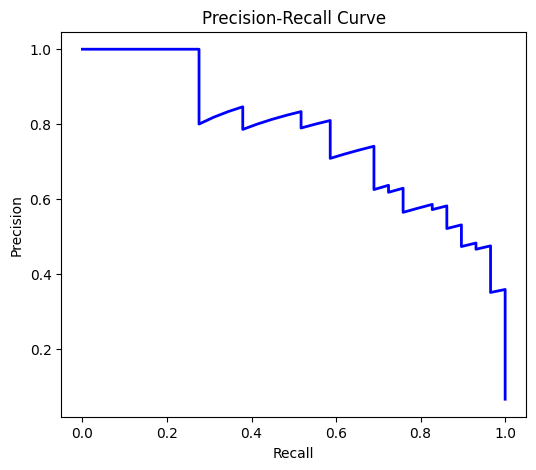

In [15]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


#Discussion and Results:
The Prediction is Inactive due to tending to predict False almost everytime. The data is unsuitable for prediction as the features are not corelated. Also, the dataset size made it difficult to achieve trustworthy insights. Training the Random Forest classifier to predict which Customer accepted campagin 1 suggests the need to generate or collect more instances with more detailes that could be used to learn the model and allow it quality in performance.